In [6]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import PcmPy as pcm
import pandas as pd
import nitools as nt
import pickle


In [7]:
f = open('data_demo_smp.p', 'rb')
Y, cond_vec, part_vec, cond_names = pickle.load(f)
N = Y.shape[1]

A central concept to keep in mind to understand RSA is the second moment matrix or G:

$$ \mathsf{G} = \frac{\mathsf{YY}^T}{\mathtt{N}} $$

Where $Y$ is a matrix with experimental observations (e.g., trials) in the rows and channels (e.g., electrodes, voxels) in the columns and $N$ is the number of channels. In our example case, each row in Y contains the beta coefficients estimated in S1 for each condition. Note that the second moment matrix is different from the variance-covariance matrix:

$$ \mathsf{\Sigma} = \frac{(Y - \bar{Y})^T (Y - \bar{Y})}{N - 1} $$

Here, we subtract the column-wise mean $\bar{Y}$ from $Y$. Instead, the second moment matrix maintains information about the mean activation observed in each condition.

Let's now calculate the second moment matrix from the first run in our example data and see how it looks like:

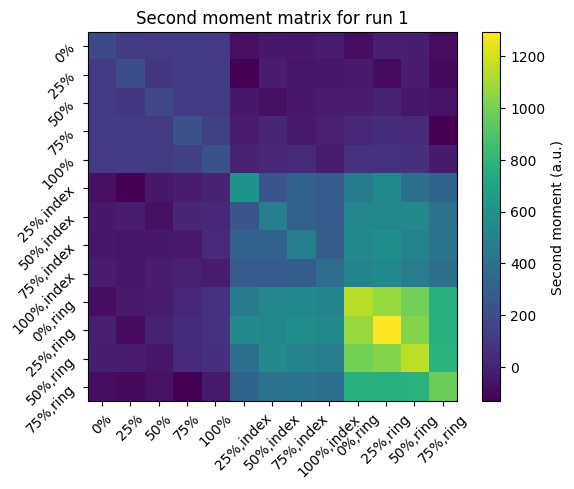

In [8]:
G = Y[:13] @ Y[:13].T / N

plt.imshow(G)
plt.xticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.yticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.title('Second moment matrix for run 1')
plt.colorbar(label='Second moment (a.u.)')

From the second moment matrix it is possible to calculate the euclidean distances between conditions. The euclidean distance between two conditions is:

$$ \mathsf{G} = \frac{\mathsf{YY}^T}{\mathtt{N}} $$

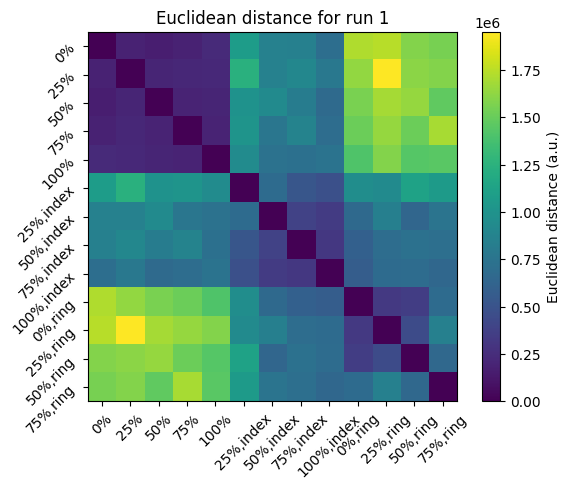

In [4]:
d_eucl = pcm.G_to_dist(G)

plt.imshow(d_eucl)
plt.xticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.yticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.title('Euclidean distance for run 1')
plt.colorbar(label='Euclidean distance (a.u.)')

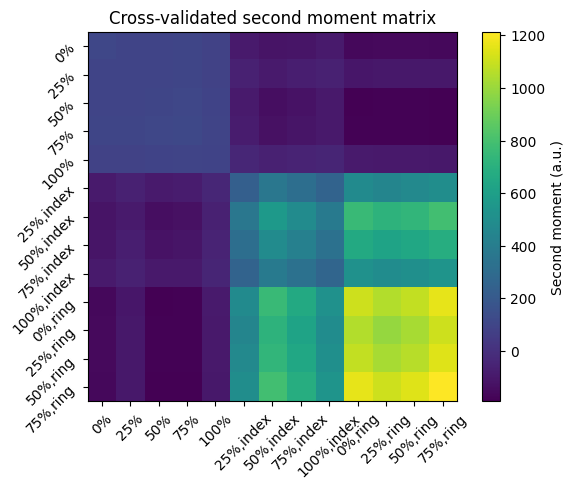

In [5]:
G_cv, _ = pcm.est_G_crossval(beta, cond_vec, part_vec)

plt.imshow(G_cv)
plt.xticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.yticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.title('Cross-validated second moment matrix')
plt.colorbar(label='Second moment (a.u.)')

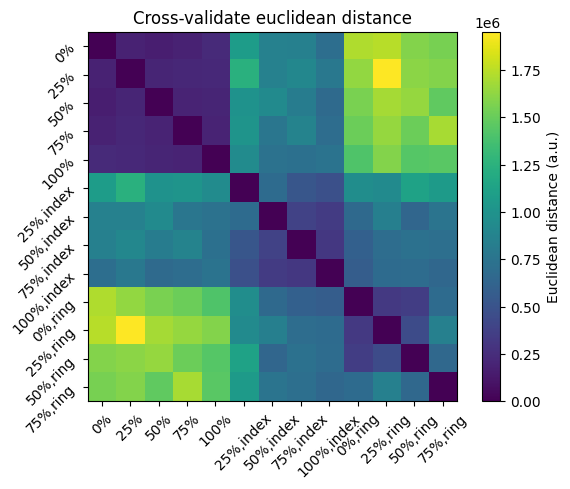

In [6]:
d_eucl_cv = pcm.G_to_dist(G_cv)

plt.imshow(d_eucl)
plt.xticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.yticks(np.arange(len(cond_names)), cond_names, rotation=45)
plt.title('Cross-validate euclidean distance')
plt.colorbar(label='Euclidean distance (a.u.)')